In [4]:
from google.colab import files
uploaded = files.upload()

Saving Combined Data.csv to Combined Data.csv


In [21]:
from re import split
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib.cm as cm
import matplotlib as mp
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [8]:
DF = pd.read_csv("Combined Data.csv")

In [9]:
DF.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [10]:
DF.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [13]:
DF.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [14]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [16]:
DF.value_counts()

,,,count
Unnamed: 0,statement,status,
53042,"I have really bad door anxiety! It's not about being scared I didn't lock the door or something, I'm just really scared of opening doors the wrong way or turning a key the wrong way in front of people or pushing instead of pulling and viceversa, it's honestly debilitating because i feel like I'm gonna die everytime I have to open a door. I wondered if anyone else has the same problem and how to fix it if possible.",Anxiety,1
0,oh my gosh,Anxiety,1
1,"trouble sleeping, confused mind, restless heart. All out of tune",Anxiety,1
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",Anxiety,1
3,I've shifted my focus to something else but I'm still worried,Anxiety,1
...,...,...,...
13,Because this worry is you.,Anxiety,1
12,"sometimes what is needed when there is a problem is to laugh until you forget that there is a problem, when you remember it, you feel restless like that well, it turns out that I still have a sad burden blah blah blah",Anxiety,1
11,"I'm confused, I'm not feeling good lately. Every time I want to sleep, I always feel restless",Anxiety,1


In [17]:
DF.isnull().sum()

,0
Unnamed: 0,0
statement,362
status,0


In [19]:
DF.shape

(53043, 3)

-- EDA --


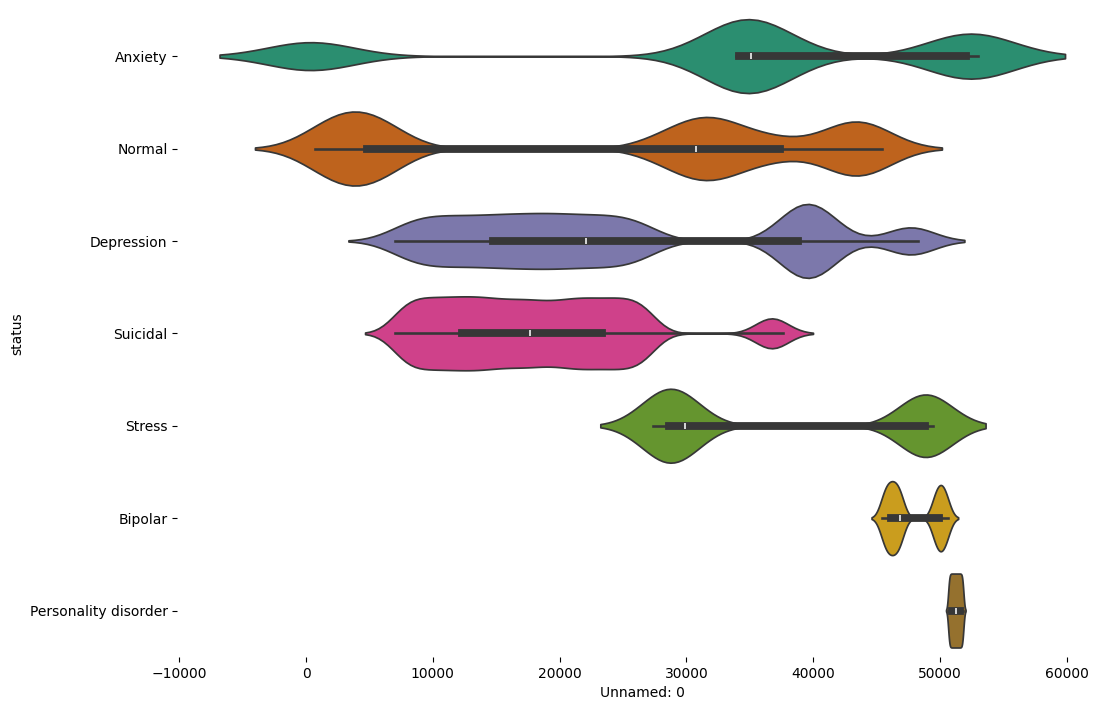

In [20]:
import seaborn as sns
figsize = (12, 1.2 * len(DF['status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(DF, x='Unnamed: 0', y='status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

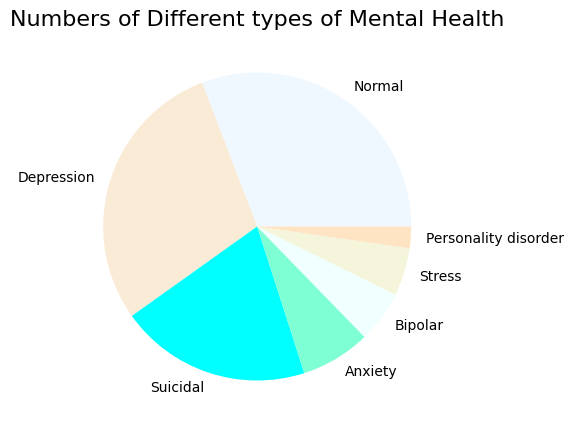

In [22]:
fig, ax = plt.subplots(figsize = (5,5))

random_colors = [color for name,color in mp.colors.cnames.items()]
ax.pie(x = DF.status.value_counts(),
       labels = DF.status.value_counts().index,
       colors =random_colors,
    )
ax.set_title('Numbers of Different types of Mental Health', fontdict={'fontsize':16})

plt.show()

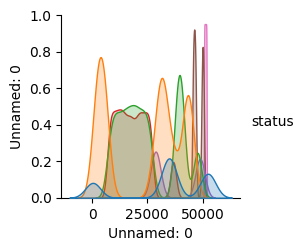

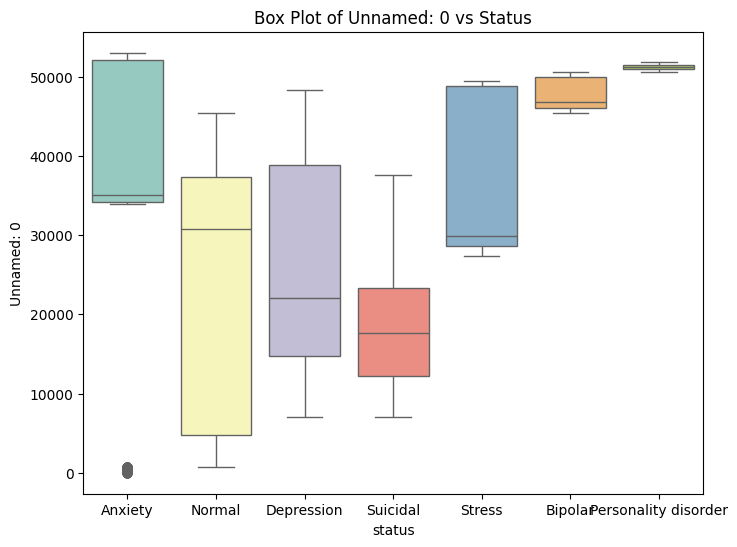

In [25]:
# Pairplot for visualization
sns.pairplot(DF, hue='status')
plt.show()

# Box plots for numerical features against status
for col in DF.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='status', y=col, data=DF, palette='Set3')
  plt.title(f'Box Plot of {col} vs Status')
  plt.show()

# Scatter plots for numerical features against each other, colored by status
for i in range(len(DF.select_dtypes(include=np.number).columns)):
  for j in range(i + 1, len(DF.select_dtypes(include=np.number).columns)):
    col1 = DF.select_dtypes(include=np.number).columns[i]
    col2 = DF.select_dtypes(include=np.number).columns[j]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col1, y=col2, data=DF, hue='status', palette='viridis')
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.show()

# Example using plotly for an interactive plot
fig = px.histogram(DF, x='status', color='status', marginal="box")
fig.show()

# Example using plotly express for a more complex visualization (replace with your desired columns)
fig = px.scatter_3d(DF, x='Unnamed: 0', y='status', z='Unnamed: 0',
              color='status')
fig.show()
